In [6]:
pip install yfinance

  Using cached yfinance-0.2.26-py2.py3-none-any.whl (62 kB)
  Using cached lxml-4.9.3.tar.gz (3.6 MB)
  Using cached frozendict-2.3.8-cp38-cp38-macosx_10_9_x86_64.whl (35 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/qingyunwang/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/pm/r6_hpq8j4hq4ppcc7_7yt1nh0000gn/T/pip-install-6t0z6gbg/lxml_743a4276ae02417e896aaa560fb003e4/setup.py'"'"'; __file__='"'"'/private/var/folders/pm/r6_hpq8j4hq4ppcc7_7yt1nh0000gn/T/pip-install-6t0z6gbg/lxml_743a4276ae02417e896aaa560fb003e4/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/pm/r6_hpq8j4hq4ppcc7_7yt1nh0000gn/T/pip-wheel-ocbmbpev
       cwd: /private/var/folders/pm/r6_hpq8j4hq4ppcc7_7yt1nh0000gn/T/p

In [2]:
import yfinance as yf

In [3]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3237 entries, 2014-09-17 to 2023-07-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3237 non-null   float64
 1   High       3237 non-null   float64
 2   Low        3237 non-null   float64
 3   Close      3237 non-null   float64
 4   Adj Close  3237 non-null   float64
 5   Volume     3237 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 177.0 KB


In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-07-24,30081.662109,30093.394531,28934.294922,29176.916016,29176.916016,15395817395
2023-07-25,29178.970703,29353.160156,29062.433594,29227.390625,29227.390625,10266772793
2023-07-26,29225.759766,29675.552734,29113.912109,29354.972656,29354.972656,13497554655


<Axes: xlabel='Date'>

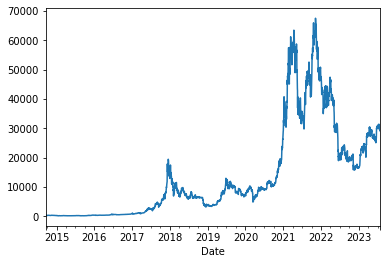

In [7]:
df['Close'].plot()

In [8]:
trainS=df[int(len(df)*.35):int(len(df)*.777)]['Adj Close']
testS=df[int(len(df)*.777):int(len(df)*.825)]['Adj Close']

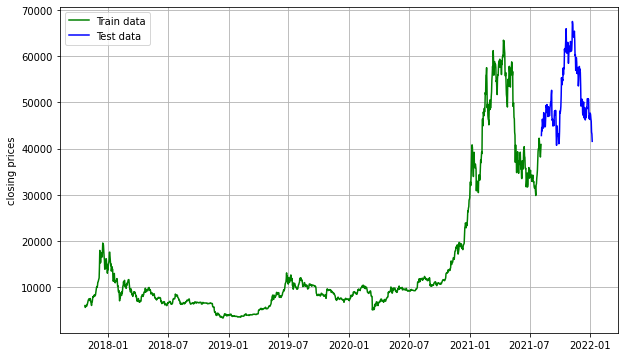

In [9]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.ylabel('closing prices')
plt.plot(trainS,'green',label='Train data')
plt.plot(testS,'blue',label='Test data')
plt.legend()

In [23]:
train=list(trainS)
test=list(testS)
model_predictions=[]
n_test=len(test)
for i in range(n_test):
    model=ARIMA(train,order=(4,1,0))
    model_fit=model.fit()
    model_predictions.append(model_fit.forecast()[0])
    train.append(test[i])


In [24]:
train_df=df[int(len(df)*.35):int(len(df)*.777)]
test_df=df[int(len(df)*.777):int(len(df)*.825)]

In [26]:
model_predictions

[40844.46125381349,
 42821.83705547719,
 44699.02723417312,
 44082.60638442528,
 46292.57667764874,
 45843.93906989223,
 45632.425742023705,
 44532.97913090345,
 47462.84933540498,
 47354.84844478618,
 47099.583081756755,
 46160.39070504623,
 44672.372281751705,
 44649.501749736504,
 46523.65201609967,
 49301.17010694828,
 49195.561981493775,
 49409.013452071726,
 49625.1491066432,
 47834.8482225488,
 48764.54466597345,
 47106.13231413536,
 48756.65506443696,
 49044.215506827655,
 48845.8200756162,
 47214.83105375911,
 47012.80408883971,
 48692.1841320811,
 49382.82925990682,
 50068.89574244341,
 50058.58868686866,
 51665.2249362308,
 52736.9768513478,
 47315.90413046424,
 45807.81655586991,
 46187.34468832892,
 44826.957284403674,
 45074.754270962585,
 45985.41132704739,
 45066.170159782385,
 46917.550470246046,
 48224.672393517365,
 47935.474856116336,
 47358.136531654396,
 48190.77845666091,
 47363.21137469253,
 43079.7716834389,
 40515.27369299849,
 43120.92695972381,
 44792.830398

In [27]:
test_df['prediction']=model_predictions

<ipython-input-27-8ac780ad6c14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['prediction']=model_predictions


In [28]:
model=ARIMA(trainS,order=(1,0,0))
model_fit=model.fit()
train_df['prediction']=model_fit.fittedvalues.values

/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-28-f5d52e344862>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_

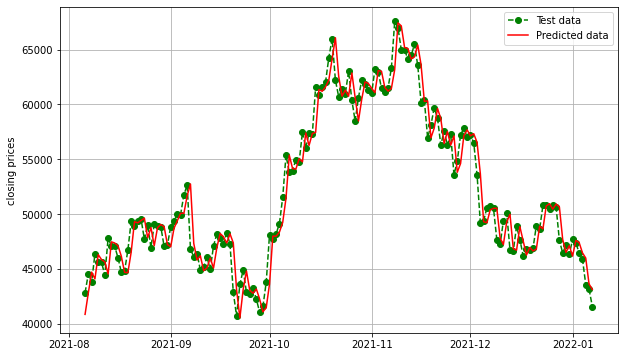

In [29]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.ylabel('closing prices')
#plt.plot(trainS,'green',label='Train data',marker='o',linestyle='dashed')
plt.plot(testS,'green',label='Test data',marker='o',linestyle='dashed')
#plt.plot(train_df['prediction'],'red',label='Test data')
plt.plot(test_df['prediction'],'red',label='Predicted data')

plt.legend()

In [267]:
mape=np.mean(np.abs(np.array((test_df['prediction']-testS).values))/np.array(testS.values))
mape

0.02642604720786359

<AxesSubplot:xlabel='Date'>

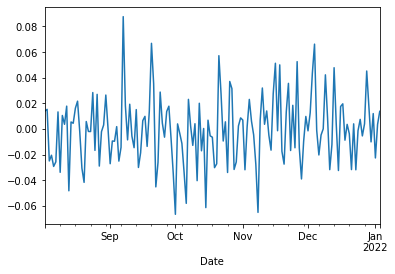

In [262]:
((test_df['prediction']-testS)/(testS.values.max())).plot()

In [1]:
import pmdarima as pm

/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [21]:
auto=pm.auto_arima(trainS)
auto

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [22]:
train=list(trainS)
test=list(testS)
model_predictions=[]
n_test=len(test)
for i in range(n_test):
    model_predictions.append(auto.forecast()[0])
    train.append(test[i])

AttributeError: 'ARIMA' object has no attribute 'forecast'